In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)
source('tests.R')
source('cleanup.R')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.2     ✔ rsample      1.1.1
✔ dials        1.1.0     ✔ tune         1.0.1
✔ infer        1.0.4     ✔ workflows    1.1.2
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.3     ✔ yardstick    1.1.0
✔ recipes      1.0.4     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks read

ERROR: Error in file(filename, "r", encoding = encoding): cannot open the connection


In [2]:
football <- read_csv("data/key_stats.csv")
football

Rows: 747 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): player_name, club, position, distance_covered
dbl (4): minutes_played, match_played, goals, assists

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


player_name,club,position,minutes_played,match_played,goals,assists,distance_covered
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Courtois,Real Madrid,Goalkeeper,1230,13,0,0,64.2
Vinícius Júnior,Real Madrid,Forward,1199,13,4,6,133.0
Benzema,Real Madrid,Forward,1106,12,15,1,121.5
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Cojocari,Sheriff,Defender,1,1,0,0,0.5
Maouassa,Club Brugge,Defender,1,1,0,0,0.2
Zesiger,Young Boys,Defender,1,1,0,0,-


In [3]:
football_data <- football |>
    mutate(position = as_factor(position)) |>
    filter(match_played < 7) |>
    select(position, goals, distance_covered)
football_data

position,goals,distance_covered
<fct>,<dbl>,<chr>
Forward,0,12.9
Defender,0,10.7
Forward,0,10.8
⋮,⋮,⋮
Defender,0,0.5
Defender,0,0.2
Defender,0,-


In [4]:
football_split <- initial_split(football_data, prop = 0.75, strata = position)
football_train <- training(football_split)
football_test <- testing(football_split)
football_train

position,goals,distance_covered
<fct>,<dbl>,<chr>
Defender,0,10.7
Defender,0,7.7
Defender,0,1.5
⋮,⋮,⋮
Midfielder,0,1
Midfielder,0,1.3
Midfielder,0,1


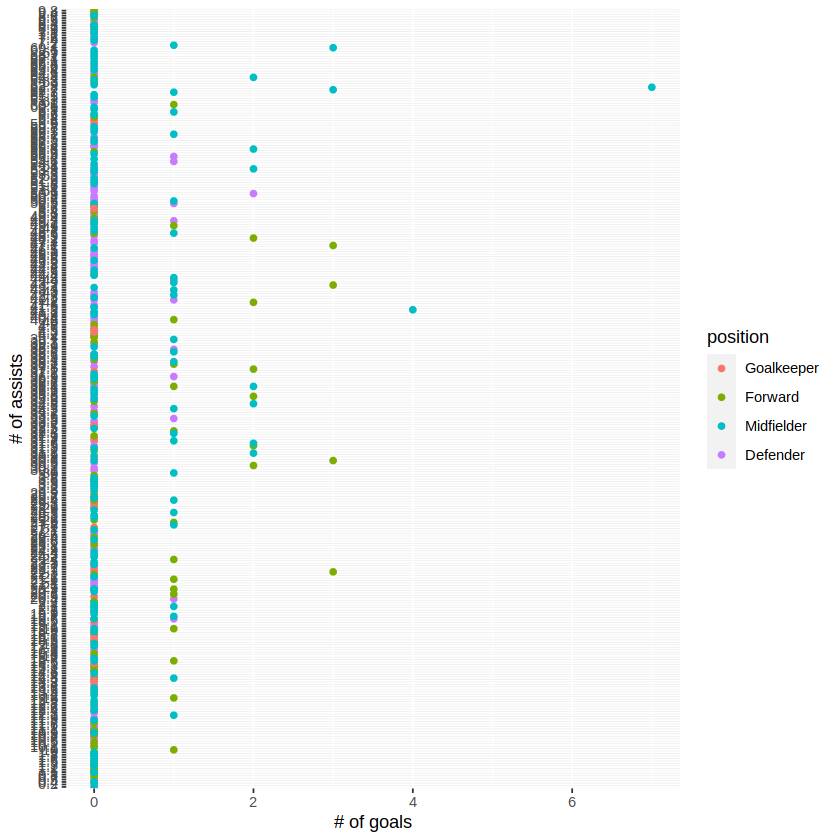

In [7]:
football_plot <- football_train |>
    ggplot(aes(x = goals, y = distance_covered, color = position)) +
    geom_point() +
    labs(x = "# of goals", y = "# of assists", color = "position")
football_plot